[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/Data-Structures/blob/master/TT20_L--BA--Back_Propagation_Lecture_Notes.ipynb)

###Part I: Calculus 

> 1) The Partial Derivative

> 2) The Gradient

> 3) Chain Rule


###Part II: Computing the Gradient of Neural Networks

> 1) Derivatives of Common Activation Functions

>*   Sigmoid
*   rectified linear unit (ReLU)
*   Tanh

> 2) Cost Function as a Composition of Activation Functions

> 3) The Gradient of a Neural network

###Part III: Gradient Descent

> 1) Use the Gradient to Find a Minimum





# Introduction

Back Propagation has a fairly simple problem state. Take a cost function, something like:

$\epsilon = \sum_i^n (y_i - \hat{y}_i(\beta))^2$

And find the weights $\beta$ that yield its minimum. I've written $\hat{y}(\beta)$ to denote that our predictions $\hat{y}$ are functions of our weights $\beta$. This is both a nitpicky and crucial point, as we will confirm later. 

The goal of this lecture is to give a concrete, nuts-and-bolts conception of exactly what is involved in accomplishing this.


# Part I: Calculus

## The Partial Derivative

According to Google the partial derivative: *is a derivative of a function of two or more variables with respect to one variable, the other(s) being treated as constant.*

Example 1: 

> $f(x,y)=x^2+y^2$

> $\frac{\partial f(x,y)}{\partial x} = 2x + 0 = 2x$

> $\frac{\partial f(x,y)}{\partial y} = 0 + 2y = 2y$

Practice Problem 1:

> $g(x,y) = \sin(x)+y$

> $\frac{\partial g(x,y)}{\partial x} = \cos(x)$

> $\frac{\partial g(x,y)}{\partial y} =1$

Practice Problem 2:*

> $h(x,y) = sin^2(x)y^3$

> $\frac{\partial h(x,y)}{\partial x} = $

> $\frac{\partial h(x,y)}{\partial y} = $

**hint: we need chain rule!*



## The Gradient

According to Kalid Azad (author of the web page Better Explained), he succinctly defines the gradient as the thing that "points in the direction of greatest increase of a function." The word "direction" here is key: the gradient is a **vector** whose entries are found (nay, computed!) by taking the partial derivatives with respect to the relevant independent variables.

$\nabla f(x,y) = (\frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y}) = (2x, 2y) = \begin{bmatrix} 2x \\ 2y \end{bmatrix} $

## Chain Rule

Chain rule allows us to find the derivative of a composition of functions. A composition of functions, might playout something like this: 

Suppose

$f(x) = x^2$

$g(x) = \sin(x)$

$(f \circ g)(x) = f(g(x)) = \sin^2(x)$

How do we take the derivative of this function? 

**Chain Rule States:** 

$(f \circ g)'(x) = f'(g(x))g'(x)$

This makes life so easy. We compute $f'(x)$ and $g'(x)$ separately:

$f'(x) = 2x$

$g'(x) = \cos(x)$

Then we just put everything together:

$(f \circ g)'(x) = 2\big( \sin (x) \big) \cos (x)$

We can restate everything we just did again, but this time in Leibniz notation. This is the same notation we used when discussing partial derivatives above:  

given: 

$y = u^2$

$u = \sin(x)$

**Chain Rule Restated:** 

$\frac{\mathrm{d} y}{\mathrm{d} x} =  \frac{\mathrm{d} y}{\mathrm{d} u} \frac{\mathrm{d} u}{\mathrm{d} x}$

Notice how we don't have to go through the trouble of writing a nested function term like $f'(g(x))$.  

$ \frac{\mathrm{d} v}{\mathrm{d} u} = 2u$

$ \frac{\mathrm{d} u}{\mathrm{d} x} = \cos(x)$

$\frac{\mathrm{d} y}{\mathrm{d} x} = 2 u \cos(x) =  2\big( \sin (x) \big) \cos (x)$

With this more compact notation, we can conceivably express the derivative for the composition of arbitrarily many functions. Say we were also given:

$z = e^{2w}$

$w = \sqrt{y}$

then $\frac{\mathrm{d} z}{\mathrm{d} x}$ is just:

$\frac{\mathrm{d} z}{\mathrm{d} x} = \frac{\mathrm{d} z}{\mathrm{d} w}\frac{\mathrm{d} w}{\mathrm{d} y}\frac{\mathrm{d} y}{\mathrm{d} u}\frac{\mathrm{d} u}{\mathrm{d} x}$

*if* we weren't too interested in substituting back in expressing everything in terms of $x$ (hint: when back propagating, we won't be), this evaluates to:


$\frac{\mathrm{d} z}{\mathrm{d} x} = \big( 2e^{2w}\big)\big( \frac{1}{2\sqrt{y}}\big)\big( 2u\big)\big( cos(x)\big)$

# Part II: 

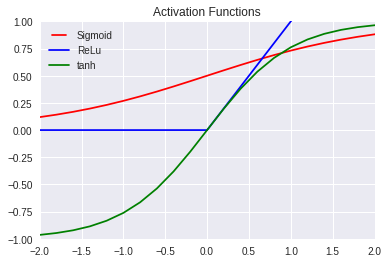

In [0]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# Red
def sigmoid(x):
  return 1/( 1 + np.exp(-x))

# Blue
def ReLu(x):
  return x * (x > 0)

# Green
def tanh(x):
  return ( np.exp(x) - np.exp(-x) ) / ( np.exp(x) + np.exp(-x) )

# Plot them!
t = np.arange(-5., 5., 0.2)
sig, = plt.plot(t, sigmoid(t), 'r', label='Sigmoid')
re, = plt.plot(t, ReLu(t), 'b', label='ReLu')
tan, = plt.plot(t, tanh(t), 'g', label='tanh')
plt.legend(handler_map={sig: HandlerLine2D(numpoints=4)})
plt.axis([-2, 2, -1, 1])
plt.title("Activation Functions")
plt.show()

## Taking the Derivatives of Activation Functions

activation functions are chosen for having nice properties. These nice properties sometimes include smoothness (i.e. differentiability), or how easy it is to compute the derivative, or restricting the range to certain values (e.g. $(0,1)$)

### The Sigmoid Function

Let's write the sigmoid function $\sigma (x)$ as the composition of two functions, $f$ and $g$:

$\qquad f(x) = x^{-1} \qquad$ and $\qquad g(x) = 1 + Ce^{-kx}$ 

Where $C$ and $k$ are arbitrary constants. The composition of these two functions is given by: 

$\qquad (f \circ g)(x) = (1 + Ce^{-kx})^{-1} = \frac{1}{1 + Ce^{-kx}}$

To take this composite function's derivative, we can apply the definition of chain rule. By the power rule, we know $f'(x) = -(x)^{-2}$, while the derivative of the exponential is given by $g'(x) =-kCe^{-kx}$, thus:

$\qquad (f \circ g)'(x) = f'(g(x))g'(x) = -(1+Ce^{-kx})^{-2}(-kCe^{-kx})$

**Simplifying the Above Expression:** In its current form, none of the nice properties of the derivative of a sigmoid are apparent. If we clean up our $(f \circ g)'(x)$, we will find we can write the derivative of a sigmoid, $\sigma'(x)$, *in terms of $\sigma(x)$ itself!* And that's a very nice property. Allow me to demonstrate: First, we expand some terms:

$\qquad  \sigma'(x) = -(1+Ce^{-kx})^{-2}(-kCe^{-kx}) = k\frac{Ce^{-kx}}{(1+Ce^{-kx})(1+Ce^{-kx})}$

Now we will be sneaky and add nothing to the numerator, in the form of $1-1$, 

$\qquad \sigma'(x) = k\frac{1+ Ce^{-kx}-1}{(1+Ce^{-kx})(1+Ce^{-kx})}$

which allows us to then separate out the expression into two fractions:

$\qquad  \sigma'(x) = k\big(\frac{1+ Ce^{-kx}}{(1+Ce^{-kx})(1+Ce^{-kx})} -  \frac{1}{(1+Ce^{-kx})(1+Ce^{-kx})}\big)$

At this point we notice two things; first, that the first fraction can be simplified to $1/(1+Ce^{-kx})$. Second, that when simplified, this expression is in fact the sigmoid function itself. Third (okay yes we should've noticed three things), the second fraction is this same sigmoid function squared! Thus:

$\qquad  \sigma'(x) = k\big(\frac{1}{1+Ce^{-kx}} -  \frac{1}{(1+Ce^{-kx})(1+Ce^{-kx})}\big)$

$\qquad  \sigma'(x) = k\big(\sigma(x) -  \sigma(x)^2\big)$

$\qquad  \sigma'(x) = k\sigma(x)(1 -  \sigma(x))$

### The ReLU Function

The rectifier (sometimes called the Rectified Linear Unit) is another activation function. It is a piece-wise function of the form:


$f(x) = \begin{cases} 
      mx & x \geq 0 \\
      0 & x < 0 
   \end{cases}$

This makes $f'(x)$ trivially easy to compute, with the one caveat that the function isn't differentiable at zero. But this is easily, um, rectified by just arbitrarily assigning $f'(0) = 0$ or  $f'(0) = m$:

$f'(x) = \begin{cases} 
      m & x \geq 0 \\
      0 & x < 0 
   \end{cases}\qquad$ or $\qquad f'(x) = \begin{cases} 
      m & x > 0 \\
      0 & x \leq 0 
   \end{cases}$
   
ReLU is currently very popular because it is not only easier to compute than $\sigma(x)$, it also tends to perform better. 

### The Tanh Function

The tanh function (pronounced "tanch") is composed of the hyperbolic sinh ("sinch") and cosh ("cosh") functions:

$\sinh(x) = e^{kx} - e^{-kx}$

$\cosh(x) = e^{kx} + e^{-kx}$

$\tanh(x) = \frac{\sinh(x)}{\cosh(x)}  =\frac{e^{kx} - e^{-kx}}{e^{kx} + e^{-kx}}$

*Exercise: show that* $\tanh'(x) = k(1-\tanh^2(x))$ (*hint: the hyperbolic functions have many identities analogous to the trig functions, such as* $\cosh^2(x) - \sinh^2(x) = 1$ *and *$\frac{1}{\cosh^2(x)} = 1 - \tanh^2(x)$ *that might be useful*):

**Solution:**

## Cost Function as a Composition of Activation Functions

Now we can finally consider an actual neural network:
>>>>>>> ![alt text](https://scontent.fmkc1-1.fna.fbcdn.net/v/t1.15752-9/39741849_1850782111704901_394883712715587584_n.png?_nc_cat=0&oh=2fc735967d7230a009a80729ac4bf750&oe=5BF416D8) 

Two hidden layers, two neurons per layer. If we suppose a sigmoidal activation function and a binary response variable, we could describe each neuron with the following equations:

$\qquad h_1 = \frac{1}{1 + e^{-(\beta_{11}x_1+\beta_{12}x_2+\beta_{13})}}$

$\qquad h_2 = \frac{1}{1 + e^{-(\beta_{21}x_1+\beta_{22}x_2+\beta_{23})}}$

$\qquad h_3 = \frac{1}{1 + e^{-(\beta_{31}h_1+\beta_{32}h_2+\beta_{33})}}$

$\qquad h_4 = \frac{1}{1 + e^{-(\beta_{41}h_1+\beta_{42}h_2+\beta_{43})}}$

$\qquad \hat{y} = \frac{1}{1 + e^{-(\beta_{1}h_3+\beta_{2}h_4+\beta_{3})}}$


And the cost function can still be written as:

$$\epsilon = \sum_i^n (y_i - \hat{y}_i(\beta))^2$$

but really, we know this to be a compacted expression of something much, much uglier, like:

$$\epsilon = \sum_i^n \Bigg(y_i - \frac{1}{1 + e^{-(\beta_{1}\big(\frac{1}{(1 + e^{-(\beta_{31}(\frac{1}{1 + e^{-(\beta_{11}x_1+\beta_{12}x_2+\beta_{13})}})+\beta_{32}(\frac{1}{1 + e^{-(\beta_{21}x_1+\beta_{22}x_2+\beta_{23})}})+\beta_{33})})}\big)  +\beta_{2}\big( \frac{1}{(1 + e^{-(\beta_{41}(\frac{1}{1 + e^{-(\beta_{11}x_1+\beta_{12}x_2+\beta_{13})}})+\beta_{42}(\frac{1}{1 + e^{-(\beta_{21}x_1+\beta_{22}x_2+\beta_{23})}})+\beta_{43})}} \big)+\beta_{3})})}\Bigg)^2$$

This is an intractible hot mess and not even worth trying to parse. We know the ultimate goal of gradient descent is to repeatedly find $\nabla _\beta \epsilon$ to incrementally improve our weights, but this expression of $\epsilon$ is just not the way to go. Let's never look at this again. 






## The Gradient of a Neural Network

The good news is, we don't need that expression. We don't even need to concern ourselves with the summation directly: if we only take the gradient of the expression $(y_1 - \hat{y}_1)^2$, we can immediately generalize this by taking the sum of the gradient across all the data. This is because the derivative of a sum is equal to the sum of the derivatives (for some generic $u$ and $v$):

$\qquad \frac{d}{dx}(u+v) = \frac{du}{dx}+\frac{dv}{dx}$

Of course, this implies  we intend to take the partial derivatives with respect to all $\beta$, none of which are currently present in the compacted expression of $\epsilon$. We saw the loss function is in essence just a bunch of nested sigma functions. Instead of working with it directly, we can work backwards (it's called back propagation for a reason) and slowly expand $\epsilon$ to contain the weigh whose partial derivative we wish to calculate. 

**The partial derivative with respect to $\beta_1$:** 

Let's first compute $\frac{\partial \epsilon}{\partial \beta_1}$. By chainrule, we know this can be rewritten as:

$\frac{\partial \epsilon}{\partial \beta_1} = \frac{\partial \epsilon}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \beta_1}$

We compute each separately. The first is fairly simple: 

$\frac{\partial \epsilon}{\partial \hat{y}} = -2(y - \hat{y})$

The important thing now, before we compute $\frac{\partial \epsilon}{\partial \beta_1}$, is to draw the analogy between the derivative we took earlier, and the derivative of specifically $\hat{y}$. Both ar sigmoids. Earlier, our sigmoid was:

 $\qquad \sigma(x) = (1 + Ce^{-kx})^{-1}$
 
 and its derivative (I use Leibnez notation here):
 
  $\qquad  \frac{{d}\sigma(x)}{{d}x} = k\sigma(x)(1 -  \sigma(x))$
 
 So let's make $\hat{y}$ look like $\sigma(x)$. Instead of writing $e^{-(\beta_{1}h_3+\beta_{2}h_4+\beta_{3})}$, we use the multiplicative law of exponents to move $\beta_3$ and $\beta_{2}h_4$ out in front of $e$:
 
 $\qquad e^{-(\beta_{1}h_3+\beta_{2}h_4+\beta_{3})} = e^{-(\beta_{2}h_4+\beta_{3})}e^{-(\beta_{1}h_3)}$
 
 This is great news because, like $C$, $(e^{-(\beta_{2}h_4+\beta_{3})})$ is treated as a constant when we take $\frac{\partial \epsilon}{\partial \beta_1}$.  Thus we can rewrite $\hat{y}$ such that it is functionally equivalent to our expression of $\sigma(x)$! That is, where $x = \beta_1$, $k = h_3$, and $C = e^{-(\beta_{2}h_4+\beta_{3})}$. Thus:
 
  $\qquad \hat{y} = (1 + e^{-(\beta_{2}h_4+\beta_{3})}e^{-h_3\beta_1})^{-1}$
 
 And its derivative, with respect to $\beta_1$:
 
 $\qquad  \frac{{\partial}\hat{y}}{{\partial}\beta_1} = h_3\hat{y}(1 -  \hat{y})$
 
 Finally, we put things together:
 
 $$\frac{\partial \epsilon}{\partial \beta_1} = -2(y - \hat{y})h_3\hat{y}(1 -  \hat{y})$$
 
 
 **The partial derivative with respect to $\beta_2$:**
 
 
 what about the next derivative?
 
$\qquad \frac{\partial \epsilon}{\partial \beta_2} = \frac{\partial \epsilon}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \beta_2}$

 $\qquad \hat{y} = (1 + e^{-(\beta_{1}h_3+\beta_{3})}e^{-h_4\beta_2})^{-1}$
 
  $\qquad \frac{\partial \epsilon}{\partial \beta_2} = -2(y - \hat{y})h_4\hat{y}(1 -  \hat{y})$
  
   **The partial derivative with respect to $\beta_3$:**
   
   The partial derivatives with respect to the bias terms are especially nice because they have no coefficient:
   
  $\frac{\partial \epsilon}{\partial \beta_3} = \frac{\partial \epsilon}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \beta_3} = -2(y - \hat{y})\hat{y}(1 -  \hat{y})$
 


$\frac{\partial \epsilon}{\partial \beta_{41}} = \frac{\partial \epsilon}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial h_4}\frac{\partial h_4}{\partial \beta_{41}}$

$\frac{\partial \epsilon}{\partial \hat{y}} = -2(y-\hat{y})$

$\frac{\partial \hat{y}}{\partial h_4} = \beta_2\hat{y}(1-\hat{y})$

$\frac{\partial h_4}{\partial \beta_{41}} = h_1h_4(1-h_4)$

 $\sigma(x) = (1 + Ce^{-kx})^{-1}$

  $\frac{{d}\sigma(x)}{{d}x} = k\sigma(x)(1 -  \sigma(x))$
  
  $h_4 = (1+e^{-(\beta_{41}h_1+ \beta_{42}h_2 +\beta_{43})})$
  
  $e^{-(\beta_{41}h_1+ \beta_{42}h_2 +\beta_{43})} =e^{(\beta_{42}h_2 +\beta_{43})}e^{-h_1\beta_{41}}$
  
  
  >>> $h_4 = (1 + e^{(\beta_{42}h_2 +\beta_{43})}e^{-h_1\beta_{41}})^{-1}$
  
  
  >>>  $\sigma(x) = (1 + Ce^{-kx})^{-1}$
  
  $\frac{\partial \epsilon}{\partial \beta_{41}} =  -2(y-\hat{y})\beta_2\hat{y}(1-\hat{y}) h_1h_4(1-h_4)$
  
  

In [0]:
def gradient_descent():
  while not time_to_stop: #these are epochs
    del_beta = 0
    for i in data:
      values = forward_propagate(i)
      del_beta_i = back_propagate(values)
      
      # del_error_del_beta_1_i = -2*(y-haty)*h_3*haty*(1-haty)
      del_beta += del_beta_i
    beta += - alpha*del_beta 
    

**Your Task:** compute all of the partial derivatives. Use them to perform gradient descent on the neural network pictured above.

In [0]:
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [[0,1,1,0]]